# 0. About

This notebook is to try PCA with clustering algorithms.
The dataset is from [Kaggle Heart Attack Analysis Prediction](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).

In [88]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Loading Data

For the features: 

- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target : 
    - 0: less chance of heart attack
    - 1: more chance of heart attack

In [3]:
# find where the data is stored
repo_path = os.path.dirname(os.getcwd())
data_path = repo_path + '\\data\\'

In [4]:
df = pd.read_csv(data_path+'Heart_Attack_Analysis_Prediction_Dataset_heart.csv')

In [7]:
# check out the general info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [8]:
# check out the head
print(df.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


Every feature looks like numerically, but we can check out the data later with the EDA.

# 2. Exploratory Data Analysis

## 2.1. Check out NA and Null

In [12]:
# check out NA
print(df.isna().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [13]:
# check out Null
print(df.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


Everything looks good!

## 2.2. Visualize Data Distribution

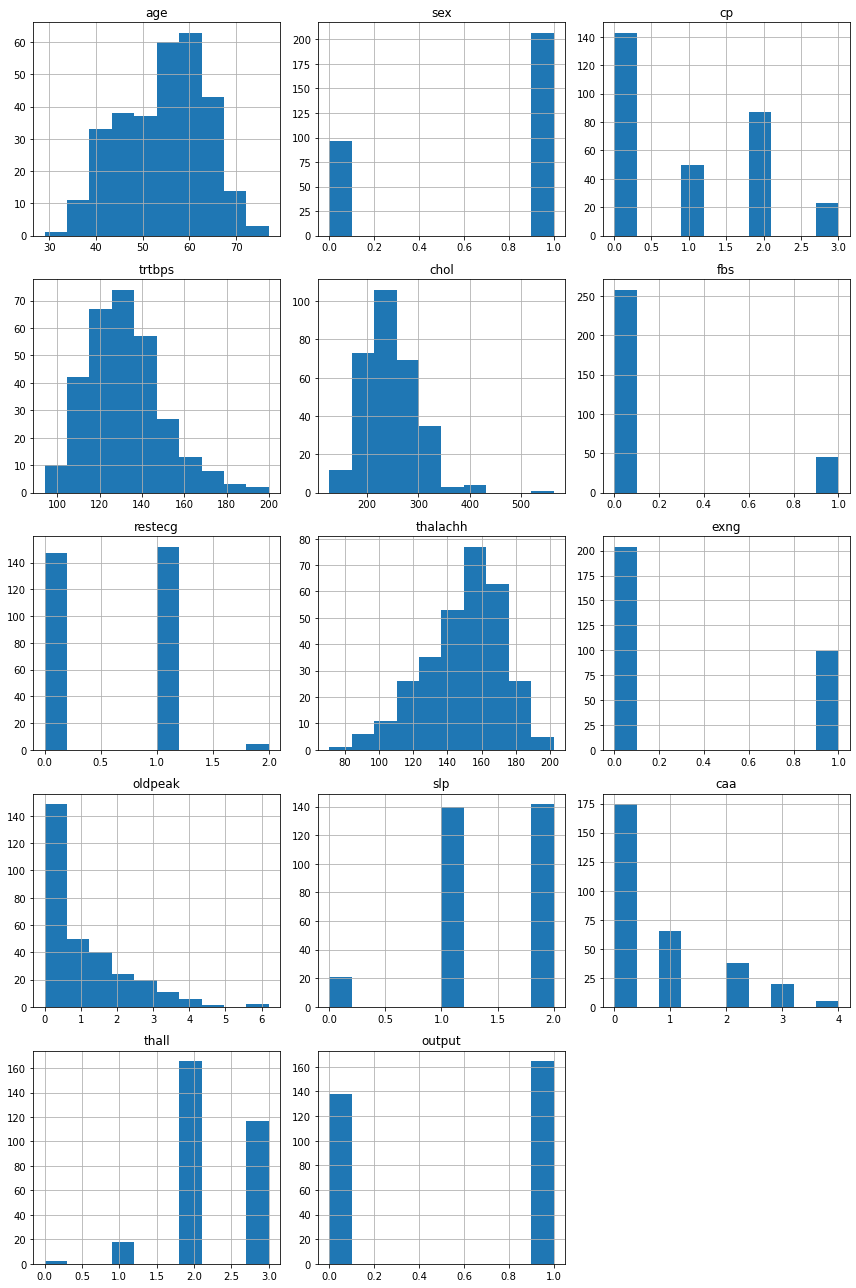

In [23]:
df.hist(layout=(5, 3), figsize=(12, 18))

plt.tight_layout()

Again, everything looks good!

# 2.3. Correlation Chart

Now we can check out the Pearson Correlation Coefficient to see how every feature is correlated with the output.

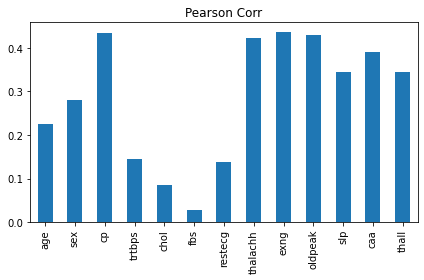

In [79]:
ax = df.corr()['output'][:-1].abs().plot.bar()
ax.set_title('Pearson Corr')
plt.tight_layout()

It seems the features in the middle have relatively low correlation with the output (target).

# 3. Data Transformation and PCA

Now we can try PCA. 
But before applying PCA, we should standardize the dataset since the features have large differences in magnitude.

In [90]:
X = df.iloc[:, :-1].to_numpy().copy()
y = df.iloc[:, -1].to_numpy().copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=20
)

In [93]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)